### **Simple Linear Regression**


In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### Author: Lajmi Syrine.

In [46]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [47]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

print(df.head(10))
df.shape

Data imported successfully
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


(25, 2)

In [48]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [49]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Find a relationship between the data

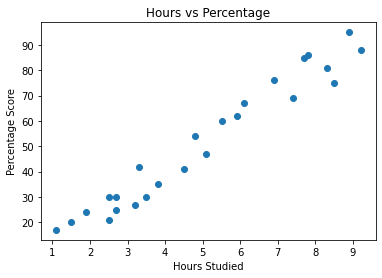

In [50]:
X=df['Hours']
Y=df['Scores']
plt.scatter(X,Y) 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

there is a positive linear relation between the number of hours studied and percentage of score.

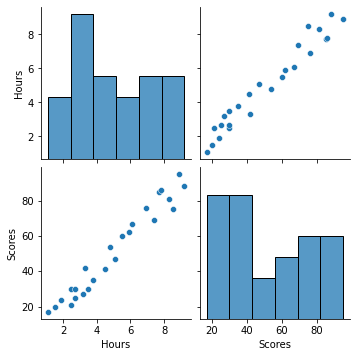

In [51]:
import seaborn as sns
sns.pairplot(df)

# Preparing the data


The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [52]:
# df Hours
x=df.iloc[:, :-1].values 
# df Scores
y=df.iloc[:, 1].values


In [53]:
# split this data into training and test sets
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

# Training the Algorithm

#  LinearRegression 

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print("Coefficient",model.coef_)
print("intercept", model.intercept_)

Coefficient [9.91065648]
intercept 2.018160041434683


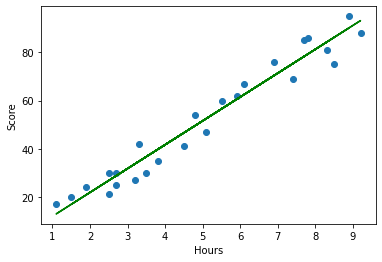

In [55]:
plt.scatter(X,Y) 
plt.xlabel('Hours')  
plt.ylabel('Score') 
line = model.coef_*X+model.intercept_
plt.plot(X, line, color= "g") 
plt.show()

# Making Predictions

In [56]:
pred= model.predict(x_test)
pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [57]:
y_pred = model.predict(X_test) # Predicting the scores

In [58]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted score': y_pred})  
df1

,Actual,Predicted score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [66]:
# You can also test with my own data
hours = 25
own_predection = model.predict([[hours]])
print("For", hours, "hours, we predict a score of", own_predection[0] )

For 25 hours, we predict a score of 249.7845720574906


# **Evaluating the model**


In [67]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
